<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/Muestra_Micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Analisis micro de una muertra especifica`***

In [2]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
text='Caudal Nm3/h'
text1='Presión kg/cm2'
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [3]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Particular9102022_1.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  

for i in range (len(dfx['FQI151'])):
     if (dfx['FQI151'].values[i])<=0:
         dfx['FQI151'].values[i]=0
         #print(dfx['FQI151'].values[i])

#print(dfx.loc[dfx['FQI151']==0])



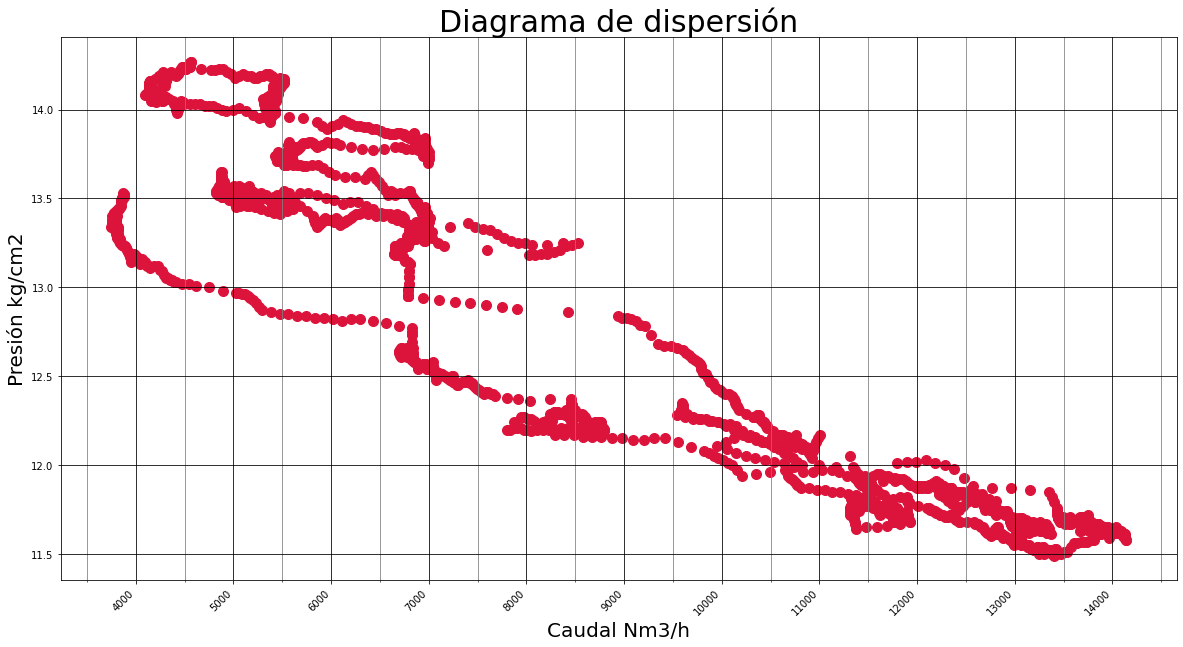

In [4]:
#@title Diagrama de Dispersión
fig1, ax = plt.subplots(1, figsize=(20,10))
ax.scatter(dfx['FQI161'],dfx['PIR161'],color='crimson',s=100)
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=10, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')
fig1.show()
ax.set_title('Diagrama de dispersión',fontsize=30)
ax.set_xlabel(text,fontsize=20)
ax.set_ylabel(text1,fontsize=20)
ax.autoscale_view()


Cantidad de items sampleados:  2880
Fecha de la muestra:  9/10/2022 22:30:00 al 9/10/2022 23:14:59
sampleo cada 1 seg


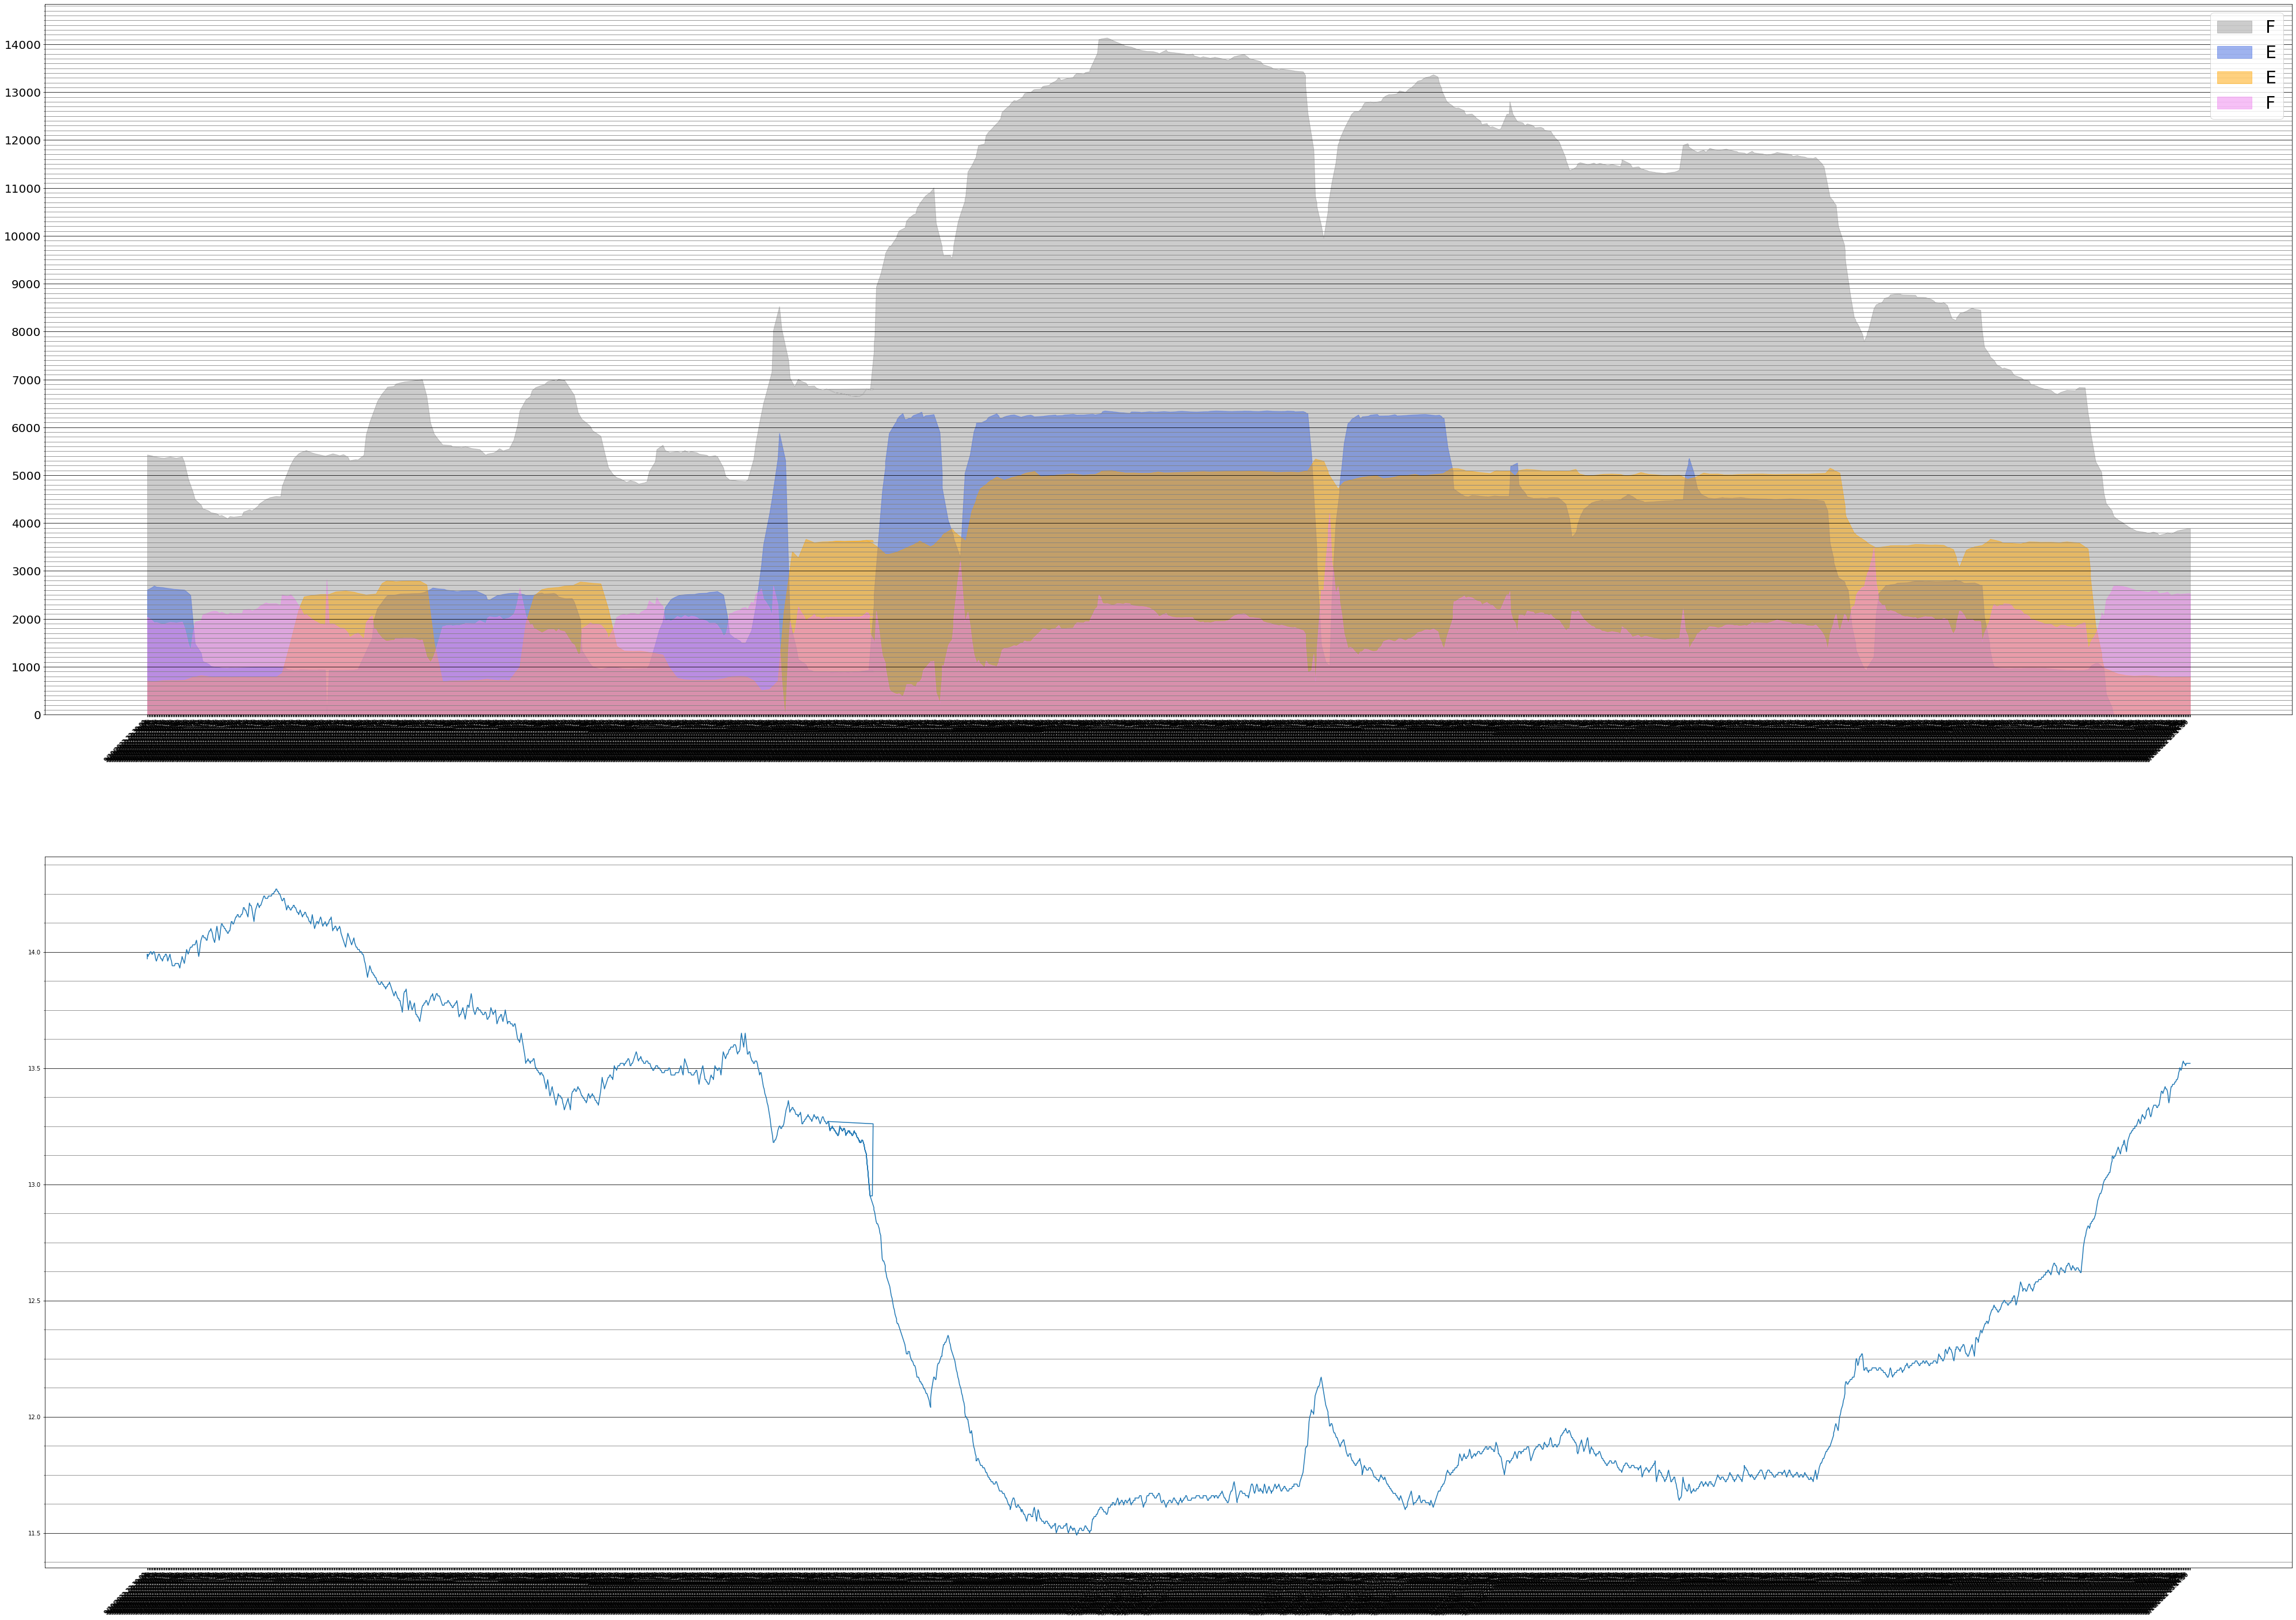

In [8]:
#@title Curvas de caudal en el intervalo .
aux=dfx.loc[dfx.loc[:,'FQI169'] >=4500]
aux1=dfx.loc[dfx.loc[:,'FQI165'] >=5000]

Color=['grey','royalblue','orange','violet']
figB, (ax,ax1)= plt.subplots(2,1, figsize=(70,50))



ax.stackplot(dfx['Time'],dfx['FQI161'],alpha=0.4,color='grey',labels="FQI161")
ax.stackplot(dfx['Time'],dfx['FQI165'],alpha=0.5,color='royalblue',labels="EAF5")
ax.stackplot(dfx['Time'],dfx['FQI169'],alpha=0.5,color='orange',labels="EAF4")
ax.stackplot(dfx['Time'],dfx['FQI151'],alpha=0.5,color='violet',labels="FQI151")

ax1.plot(dfx['Time'],dfx['PIR161'])
labels = ax1.get_xticklabels()
labels2 = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=10, horizontalalignment='right')
plt.setp(labels1,fontsize=20, horizontalalignment='right')
plt.setp(labels2, rotation=45,fontsize=10, horizontalalignment='right')

ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(100),)
#ax1.yaxis.set_major_locator(MultipleLocator(1),)
ax1.yaxis.set_minor_locator(MultipleLocator(0.125),)
ax.axes.grid(True, which='minor',color='grey',axis='y')
ax.axes.grid(True, which='major',color='black',axis='y')
ax1.axes.grid(True, which='minor',color='grey',axis='y')
ax1.axes.grid(True, which='major',color='black',axis='y')

print('Cantidad de items sampleados: ', len(dfx.index))

print('Fecha de la muestra: ',dfx.Time[0], 'al',dfx.Time[(len(dfx.index)-1)])
print('sampleo cada 1 seg')

ax.legend(fontsize=30)


figB.show()



In [ ]:
aux
figc, (ax2)= plt.subplots(1, figsize=(50,10))

ax2.stackplot(aux['Time'],aux['FQI169'],alpha=0.4,color='red')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=50, horizontalalignment='right')
plt.setp(labels1,fontsize=40, horizontalalignment='right')
ax.yaxis.set_major_locator(MultipleLocator(1000),)
ax.yaxis.set_minor_locator(MultipleLocator(100),)
figc.show()
print(aux.FQI169.describe())

print(aux['Time'].values[0])
print(aux['Time'].values[len(aux.index)-1])


In [ ]:

figd, (ax5)= plt.subplots(1, figsize=(50,10))

ax5.stackplot(aux['Time'],aux['FQI165'],alpha=0.4,color='green')
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels(which='both')
plt.setp(labels, rotation=45,fontsize=50, horizontalalignment='right')
plt.setp(labels1,fontsize=40, horizontalalignment='right')
ax5.yaxis.set_major_locator(MultipleLocator(1000),)
ax5.yaxis.set_minor_locator(MultipleLocator(100),)
figd.show()
print(aux1.FQI165.describe())

print(aux1['Time'].values[0])
print(aux1['Time'].values[len(aux1.index)-1])
